In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load the housing dataset

#df_ad_housing = pd.read_csv('/Users/ayushyapare/Desktop/Ayushyas_Life/Work/Projects/Final_Project/Housing_Price_Prediction_Madrid/data/processed/merged_datasets.csv')
df_ad_housing = pd.read_csv('/Users/ayushyapare/Desktop/Ayushyas_Life/Work/Projects/Final_Project/Housing_Price_Prediction_Madrid/data/processed/Additional_Dataset_wo_null_ayushya.csv', index_col=0)
df_ad_housing.head()
#df_ad_housing.head()

,price,house_type_2,rooms,m2,elevator,garage,neighborhood,district,house_type_,floor
0,495000,exterior,3,118.0,True,True,Chopera,Arganzuela,Apartment,1
1,485000,exterior,2,82.0,True,True,Palos de Moguer,Arganzuela,Apartment,2
2,315000,exterior,2,72.0,False,False,Legazpi,Arganzuela,Apartment,2
3,585000,exterior,2,174.0,True,True,Palos de Moguer,Arganzuela,Apartment,4
4,255000,exterior,3,75.0,False,False,Acacias,Arganzuela,bajo,0


#### Basic Analysis

In [3]:
df_ad_housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12391 entries, 0 to 15974
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         12391 non-null  int64  
 1   house_type_2  12391 non-null  object 
 2   rooms         12391 non-null  int64  
 3   m2            12391 non-null  float64
 4   elevator      12391 non-null  bool   
 5   garage        12391 non-null  bool   
 6   neighborhood  12391 non-null  object 
 7   district      12391 non-null  object 
 8   house_type_   12391 non-null  object 
 9   floor         12391 non-null  int64  
dtypes: bool(2), float64(1), int64(3), object(4)
memory usage: 895.4+ KB


In [4]:
df_ad_housing.columns

Index(['price', 'house_type_2', 'rooms', 'm2', 'elevator', 'garage',
       'neighborhood', 'district', 'house_type_', 'floor'],
      dtype='object')

<Axes: xlabel='house_type_2', ylabel='count'>

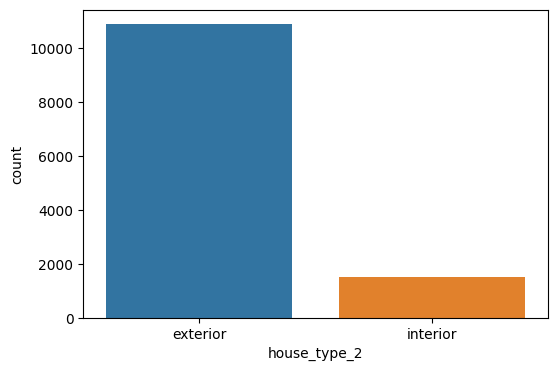

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(x='house_type_2',data=df_ad_housing)


<Axes: xlabel='elevator', ylabel='count'>

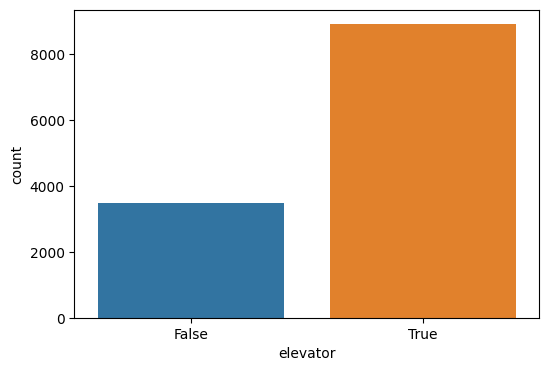

In [6]:
plt.figure(figsize=(6,4))
sns.countplot(x='elevator',data=df_ad_housing)

<Axes: xlabel='garage', ylabel='count'>

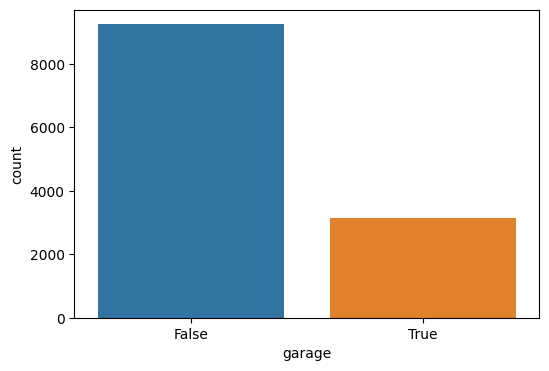

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(x='garage',data=df_ad_housing)

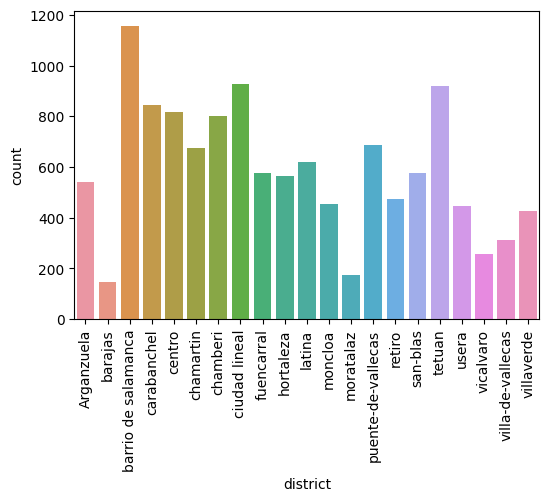

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x='district',data=df_ad_housing)
plt.xticks(rotation = 90)
plt.show()

In [9]:
import unicodedata
import re

# Function to remove digits
def remove_digits(name):
    # Remove digits
    name = re.sub(r'\d+', '', name)
    # Remove hyphens
    name = re.sub(r'-', ' ', name)
    # Strip leading and trailing whitespaces
    name = name.strip()
    return name

# Function to remove accents
def remove_accents(name):
    nfkd_form = unicodedata.normalize('NFKD', name)
    return ''.join([c for c in nfkd_form if not unicodedata.combining(c)])

# Apply the functions
df_ad_housing['neighborhood'] = df_ad_housing['neighborhood'].str.lower()
df_ad_housing['neighborhood'] = df_ad_housing['neighborhood'].apply(remove_digits)
df_ad_housing['neighborhood'] = df_ad_housing['neighborhood'].apply(remove_accents)




In [10]:
# Calculate the value counts for the 'neighborhood' column
neighborhood_counts = df_ad_housing['neighborhood'].value_counts()

# Find the maximum value count
max_count = neighborhood_counts.max()

# Determine the threshold (0.2 of the maximum value count)
threshold = 0.2 * max_count

# Identify the neighborhoods with counts below the threshold
low_count_neighborhoods = neighborhood_counts[neighborhood_counts < threshold].index

#df_ad_housing = df_ad_housing[~df_ad_housing['neighborhood'].isin(low_count_neighborhoods)]
df_ad_housing = df_ad_housing[~df_ad_housing['neighborhood'].isin(low_count_neighborhoods)]


/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


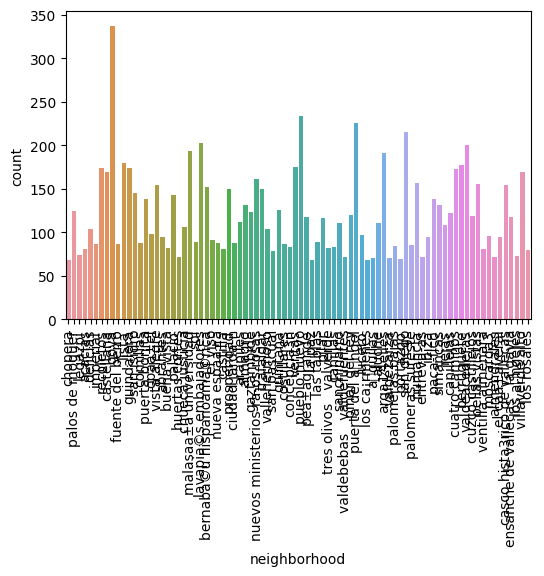

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x='neighborhood',data=df_ad_housing)
plt.xticks(rotation = 90)
plt.show()

#### Advanced Analysis

<Axes: >

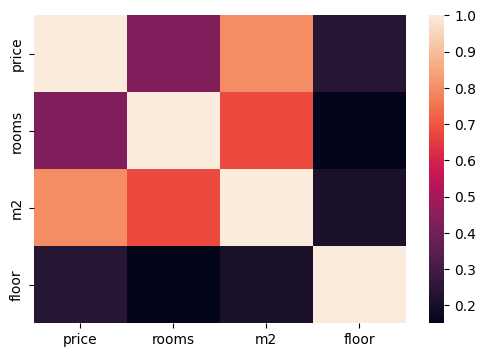

In [12]:
numeric_cols = df_ad_housing.select_dtypes(include=['float64','int64']).columns
df_ad_housing[numeric_cols].corr()
plt.figure(figsize=(6,4))
sns.heatmap(df_ad_housing[numeric_cols].corr())

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


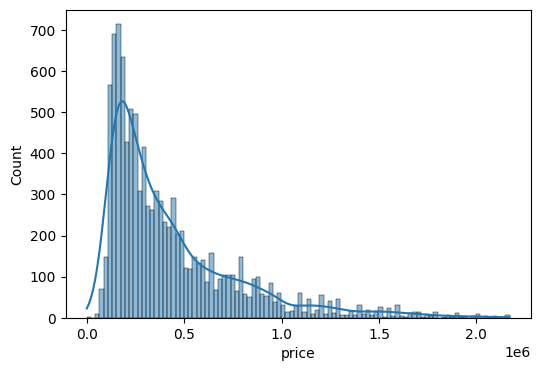

In [13]:
plt.figure(figsize=(6,4))
sns.histplot(df_ad_housing['price'],bins=100, kde=True)
plt.show()

In [14]:
'''q = df_ad_housing['price'].quantile(0.95)

df_ad_housing = df_ad_housing[df_ad_housing['price']<q]

plt.figure(figsize=(6,4))
sns.histplot(df_ad_housing['price'],bins=100, kde=True)
plt.show()'''

"q = df_ad_housing['price'].quantile(0.95)\n\ndf_ad_housing = df_ad_housing[df_ad_housing['price']<q]\n\nplt.figure(figsize=(6,4))\nsns.histplot(df_ad_housing['price'],bins=100, kde=True)\nplt.show()"

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


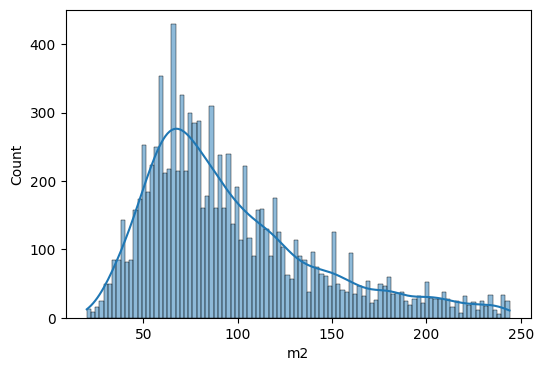

In [15]:
plt.figure(figsize=(6,4))
sns.histplot(df_ad_housing['m2'],bins=100, kde=True)
plt.show()

In [16]:
'''q = df_ad_housing['m2'].quantile(0.95)

df_ad_housing = df_ad_housing[df_ad_housing['m2']<q]

plt.figure(figsize=(6,4))
sns.histplot(df_ad_housing['m2'],bins=100, kde=True)
plt.show()'''

"q = df_ad_housing['m2'].quantile(0.95)\n\ndf_ad_housing = df_ad_housing[df_ad_housing['m2']<q]\n\nplt.figure(figsize=(6,4))\nsns.histplot(df_ad_housing['m2'],bins=100, kde=True)\nplt.show()"

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


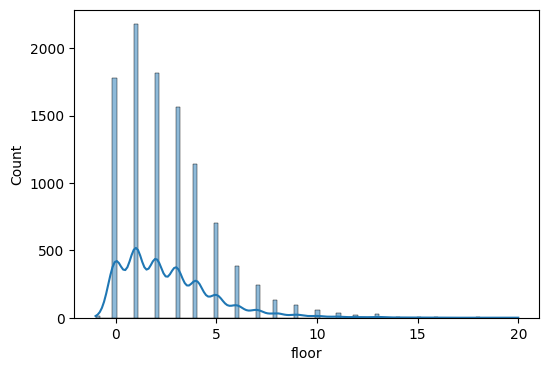

In [17]:
plt.figure(figsize=(6,4))
sns.histplot(df_ad_housing['floor'],bins=100, kde=True)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


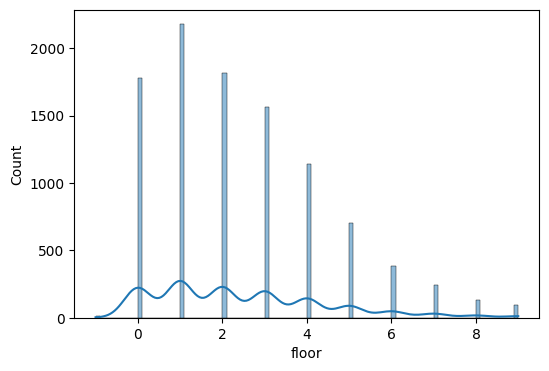

In [18]:
q = df_ad_housing['floor'].quantile(0.95)

df_ad_housing = df_ad_housing[df_ad_housing['floor']<10]

plt.figure(figsize=(6,4))
sns.histplot(df_ad_housing['floor'],bins=100, kde=True)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


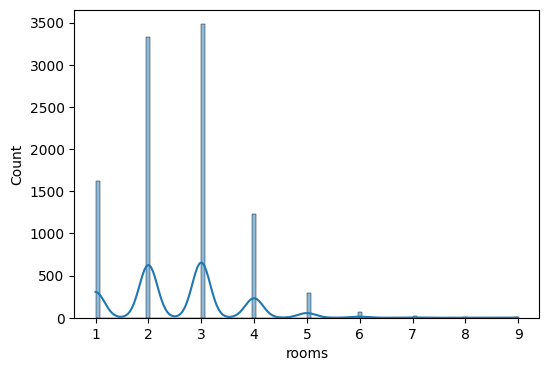

In [19]:
plt.figure(figsize=(6,4))
sns.histplot(df_ad_housing['rooms'],bins=100, kde=True)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


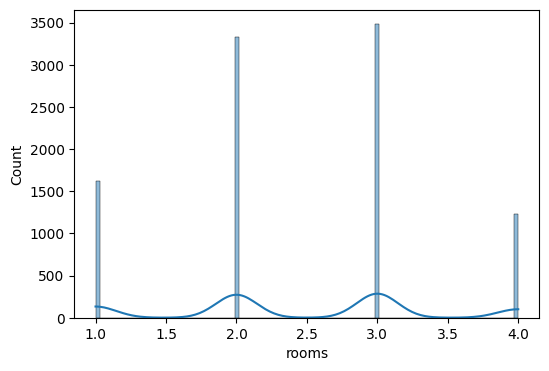

In [20]:
q = df_ad_housing['rooms'].quantile(0.9)

df_ad_housing = df_ad_housing[df_ad_housing['rooms']<5]

plt.figure(figsize=(6,4))
sns.histplot(df_ad_housing['rooms'],bins=100, kde=True)
plt.show()

#### Visualizing each feature vs price

In [21]:
df_ad_housing.drop(df_ad_housing[(df_ad_housing['m2'] == 60) & (df_ad_housing['price'] < 1000)].index, inplace=True)

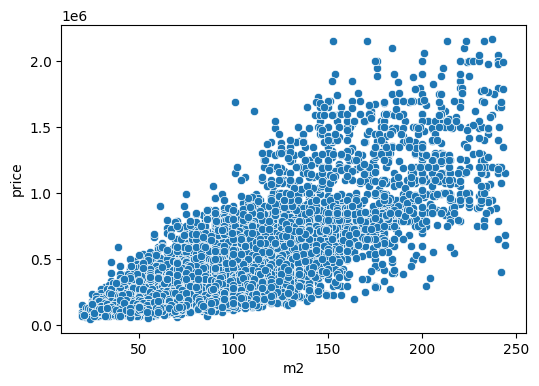

In [22]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x = 'm2',
    y = 'price',
    data= df_ad_housing)
plt.show()

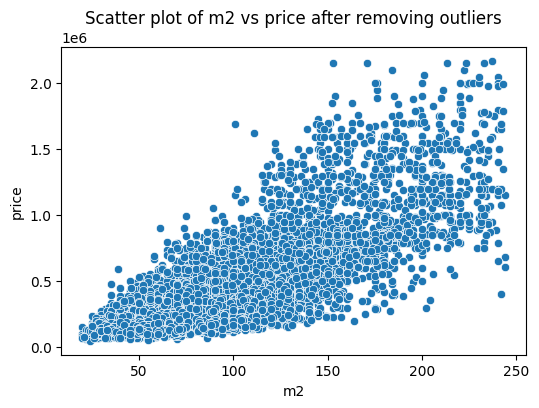

In [23]:

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_ad_housing[['m2', 'price']].quantile(0.05)
Q3 = df_ad_housing[['m2', 'price']].quantile(0.95)

# Calculate the IQR
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_ad_housing = df_ad_housing[
    (df_ad_housing['m2'] >= lower_bound['m2']) & (df_ad_housing['m2'] <= upper_bound['m2']) &
    (df_ad_housing['price'] >= lower_bound['price']) & (df_ad_housing['price'] <= upper_bound['price'])
]

# Plot the data after removing outliers
plt.figure(figsize=(6, 4))
sns.scatterplot(
    x='m2',
    y='price',
    data=df_ad_housing)
plt.title('Scatter plot of m2 vs price after removing outliers')
plt.show()


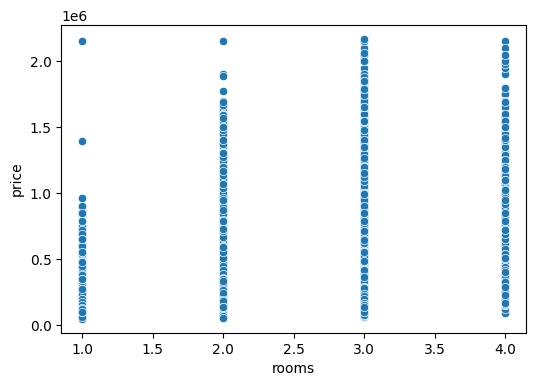

In [24]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x = 'rooms',
    y = 'price',
    data= df_ad_housing)
plt.show()

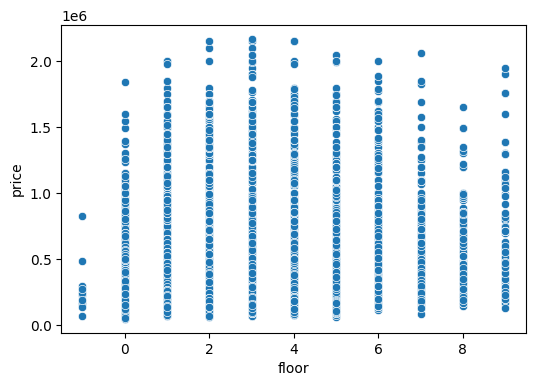

In [25]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x = 'floor',
    y = 'price',
    data= df_ad_housing)
plt.show()

In [26]:
#pip install shap

In [27]:
from pycaret.regression import *

In [28]:
# Setup the environment in PyCaret
regression_setup = setup(
    data=df_ad_housing,
    #test_data=test_data,
    target = 'price',
    session_id=9,
    ignore_features=['elevator'],
    numeric_imputation = 'mean',
    categorical_imputation = 'mode',
    remove_multicollinearity=True,
    multicollinearity_threshold = 0.9,
    transformation= True,
    transformation_method = 'yeo-johnson',
    normalize = True,
    normalize_method = 'zscore',
    #pca=True,
    #pca_components='mle',
    log_data=False,
    log_experiment=False
    )

,Description,Value
0,Session id,9
1,Target,price
2,Target type,Regression
3,Original data shape,"(9657, 10)"
4,Transformed data shape,"(9657, 33)"
5,Transformed train set shape,"(6759, 33)"
6,Transformed test set shape,"(2898, 33)"
7,Ignore features,1
8,Numeric features,3
9,Categorical features,4


In [29]:
best_models = compare_models(cross_validation=True,
                             n_select=3,
                             )

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,68333.3217,12926597628.3975,113580.2832,0.8776,0.2181,0.1743,0.2890
rf,Random Forest Regressor,68160.0029,13319060688.8195,115245.6304,0.8740,0.2208,0.1746,0.2210
et,Extra Trees Regressor,67198.6777,13643169062.0976,116680.6902,0.8711,0.2227,0.1728,0.2160
gbr,Gradient Boosting Regressor,71749.5819,13835932342.8347,117462.8681,0.8691,0.2312,0.1871,0.1230
knn,K Neighbors Regressor,81676.4734,18421190231.1551,135609.8104,0.8266,0.2554,0.2038,0.0440
ada,AdaBoost Regressor,116247.2797,24110840684.2404,155063.1844,0.7729,0.3989,0.4073,0.0690
dt,Decision Tree Regressor,89442.4742,25160808228.8791,158076.7268,0.7637,0.2932,0.2261,0.0390
lar,Least Angle Regression,108604.0975,25496973067.2595,159435.2345,0.7603,0.5855,0.3561,0.0510
br,Bayesian Ridge,108471.6265,25503722391.9222,159455.9782,0.7603,0.5908,0.3550,0.0390
llar,Lasso Least Angle Regression,108592.4600,25504583546.2128,159459.5504,0.7602,0.5893,0.3559,0.0370


Processing:   0%|          | 0/79 [00:00<?, ?it/s]

In [30]:
best_model = stack_models(best_models, choose_better=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,67490.4938,13409732162.7351,115800.3979,0.8497,0.2227,0.1747
1,66828.3574,14491508398.4435,120380.6812,0.8751,0.2107,0.1672
2,67802.4225,12709739579.7258,112737.4808,0.8958,0.2032,0.1668
3,66960.3023,12842342102.2739,113324.0579,0.8826,0.2126,0.1650
4,66174.5223,11932978611.5088,109238.1738,0.8794,0.2187,0.1744
5,66295.7826,11434450203.9881,106931.9887,0.9000,0.2263,0.1797
6,64593.5197,11559688518.6758,107515.9919,0.8941,0.2058,0.1610
7,67348.1388,13707010106.8000,117076.9410,0.8693,0.2092,0.1661
8,62111.6922,10510140925.7571,102518.9784,0.8957,0.2105,0.1675


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [31]:
#et = create_model('et')
lbgm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,70281.0503,13935668322.9814,118049.4317,0.8438,0.2291,0.1804
1,69809.9470,14697881955.9673,121234.8215,0.8734,0.2198,0.1757
2,68664.8257,12683088388.3676,112619.2186,0.8960,0.2078,0.1693
3,69407.5551,13057688694.1751,114270.2441,0.8806,0.2201,0.1722
4,68920.7760,12602079221.1955,112258.9828,0.8726,0.2255,0.1808
5,68876.6459,11959657477.0871,109360.2189,0.8954,0.2305,0.1845
6,67669.7008,12363792999.2441,111192.5942,0.8867,0.2111,0.1675
7,70156.8819,14726516169.2329,121352.8581,0.8596,0.2169,0.1740
8,64488.6570,10826144242.0040,104048.7590,0.8926,0.2167,0.1744


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [32]:
# ensemble with bagging
#ensemble_model_ = ensemble_model(et, method = 'Bagging')

In [33]:
# ensemble with boosting
#ensemble_model_ = ensemble_model(et, method = 'Boosting')

In [34]:
# blend top 3 models
#blend_model_ = blend_models(best_models)

In [35]:
holdout_pred = predict_model(best_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,62917.2959,10726273524.0918,103567.7243,0.9051,0.2060,0.1610


In [36]:
holdout_pred['difference'] = abs(holdout_pred['price'] - holdout_pred['prediction_label'])
holdout_pred[['price','prediction_label','difference']].describe()

,price,prediction_label,difference
count,2.898000e+03,2.898000e+03,2898.000000
mean,4.178125e+05,4.163389e+05,62917.295915
std,3.362155e+05,3.186212e+05,82280.152533
min,4.750000e+04,7.810935e+04,41.020111
25%,1.830000e+05,1.951209e+05,15476.508023
50%,2.990000e+05,3.024545e+05,35983.666532
75%,5.000000e+05,5.235491e+05,75472.667118
max,2.170000e+06,1.811428e+06,693155.951287


In [37]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score
MAE = mean_absolute_error(holdout_pred['price'], holdout_pred['prediction_label'])
RMSE = np.sqrt(mean_squared_error(holdout_pred['price'], holdout_pred['prediction_label']))
R2 = explained_variance_score(holdout_pred['price'], holdout_pred['prediction_label'])
NRMSE = RMSE/(max(holdout_pred['price']) - min(holdout_pred['price']))
print('MAE: ', MAE)
print('RMSE: ', RMSE)
print('R2: ', R2)
print('NRMSE: ', NRMSE)


MAE:  62917.295914991526
RMSE:  103567.72433577842
R2:  0.9050980141302843
NRMSE:  0.04879515869765767


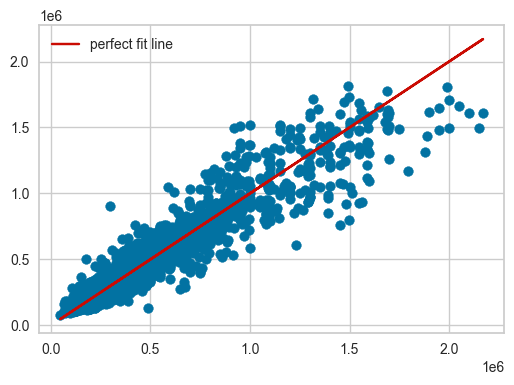

In [38]:
plt.figure(figsize=(6,4))

# Our predictions
plt.scatter(holdout_pred['price'], holdout_pred['prediction_label']);

# Perfect predictions
plt.plot(holdout_pred['price'], holdout_pred['price'], color='r', label='perfect fit line')
plt.legend()

In [39]:
interpret_model(lbgm, plot = 'reason', observation = 3)

In [40]:
df_unseen = pd.read_csv(
    '/Users/ayushyapare/Desktop/Ayushyas_Life/Work/Projects/Final_Project/Housing_Price_Prediction_Madrid/data/processed/scraped_data_cleaned_Emanuela.csv'
)

In [41]:
df_unseen.head(2)

,price,house_type,house_type_2,rooms,m2,elevator,garage,neighborhood,district
0,995000,planta 2,exterior,4,118.0,1,0,Castellana,salamanca
1,1130000,planta 3,exterior,2,78.0,1,1,Recoletos,salamanca


In [42]:

# Create the new columns
df_unseen['house_type_'] = df_unseen['house_type']
df_unseen['floor'] = 'n/a'

import re
# Function to categorize house_type_ and floor
def categorize_house_type(house_type):
    match = re.match(r'^planta\s*(-?\d+)$', house_type)
    if match:
        return 'Apartment', match.group(1)
    else:
        return house_type, 'n/a'

# Apply the function to the DataFrame and create new columns
df_unseen[['house_type_', 'floor']] = df_unseen['house_type'].apply(lambda x: pd.Series(categorize_house_type(x)))

df_unseen.drop(columns=['house_type'], inplace=True)
df_unseen['floor'].replace('n/a','0',inplace=True)

df_unseen['floor'] = pd.to_numeric(df_unseen['floor'], errors='coerce')

In [43]:
df_unseen['elevator'] = df_unseen['elevator'].map({0: 'False', 1: 'True'}).astype('bool')
df_unseen['garage'] = df_unseen['garage'].map({0: 'False', 1: 'True'}).astype('bool')

In [44]:

import unicodedata
import re
# Function to remove digits
def remove_digits(name):
    # Remove digits
    name = re.sub(r'\d+', '', name)
    # Remove hyphens
    name = re.sub(r'-', ' ', name)
    # Strip leading and trailing whitespaces
    name = name.strip()
    return name
# Function to remove accents
def remove_accents(name):
    nfkd_form = unicodedata.normalize('NFKD', name)
    return ''.join([c for c in nfkd_form if not unicodedata.combining(c)])
# Apply the functions
df_unseen['neighborhood'] = df_unseen['neighborhood'].str.lower()
df_unseen['neighborhood'] = df_unseen['neighborhood'].apply(remove_digits)
df_unseen['neighborhood'] = df_unseen['neighborhood'].apply(remove_accents)

# Calculate the value counts for the 'neighborhood' column
neighborhood_counts = df_unseen['neighborhood'].value_counts()
# Find the maximum value count
max_count = neighborhood_counts.max()
# Determine the threshold (0.2 of the maximum value count)
threshold = 0.2 * max_count
# Identify the neighborhoods with counts below the threshold
low_count_neighborhoods = neighborhood_counts[neighborhood_counts < threshold].index
#df_ad_housing = df_ad_housing[~df_ad_housing['neighborhood'].isin(low_count_neighborhoods)]
df_unseen = df_unseen[~df_unseen['neighborhood'].isin(low_count_neighborhoods)]

'''q = df_unseen['price'].quantile(0.95)
df_unseen = df_unseen[df_unseen['price']<q]


q = df_unseen['m2'].quantile(0.95)
df_unseen = df_unseen[df_unseen['m2']<q]'''

q = df_unseen['floor'].quantile(0.95)
df_unseen = df_unseen[df_unseen['floor']<10]


q = df_unseen['rooms'].quantile(0.95)
df_unseen = df_unseen[df_unseen['rooms']<5]



# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_ad_housing[['m2', 'price']].quantile(0.05)
Q3 = df_unseen[['m2', 'price']].quantile(0.95)

# Calculate the IQR
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_unseen = df_unseen[
    (df_unseen['m2'] >= lower_bound['m2']) & (df_unseen['m2'] <= upper_bound['m2']) &
    (df_unseen['price'] >= lower_bound['price']) & (df_unseen['price'] <= upper_bound['price'])
]



In [45]:
unseen_pred = predict_model(best_model, data=df_unseen)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,453905.0912,509905077597.0069,714076.3808,0.2516,0.4558,0.3026


In [46]:
unseen_pred.describe()

,rooms,m2,floor,price,prediction_label
count,628.000000,628.000000,628.000000,6.280000e+02,6.280000e+02
mean,2.651274,147.585983,2.848726,1.254269e+06,8.298199e+05
std,1.007649,78.271004,2.126250,8.260650e+05,3.747112e+05
min,0.000000,20.000000,0.000000,1.390000e+05,1.900295e+05
25%,2.000000,92.000000,1.000000,6.990000e+05,5.621108e+05
50%,3.000000,133.000000,2.000000,1.100000e+06,7.890616e+05
75%,3.000000,194.500000,4.000000,1.535000e+06,1.023048e+06
max,4.000000,593.000000,9.000000,5.650000e+06,1.846622e+06


In [47]:
unseen_pred[['price','prediction_label']].head(5)

,price,prediction_label
0,995000,9.358956e+05
1,1130000,7.263127e+05
2,3600000,1.624705e+06
3,3500000,1.695895e+06
5,3750000,1.693582e+06


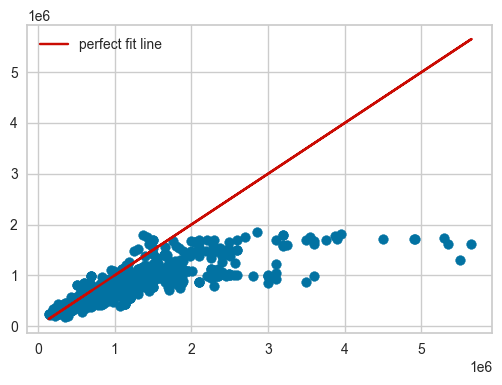

In [48]:
plt.figure(figsize=(6,4))

# Our predictions
plt.scatter(unseen_pred['price'], unseen_pred['prediction_label']);

# Perfect predictions
plt.plot(unseen_pred['price'], unseen_pred['price'], color='r', label='perfect fit line')
plt.legend()

In [49]:
import sys
sys.path.append('/Users/ayushyapare/Desktop/Ayushyas_Life/Work/Projects/Snippets')

from DataFrame_Analysis import analyze_dataframe

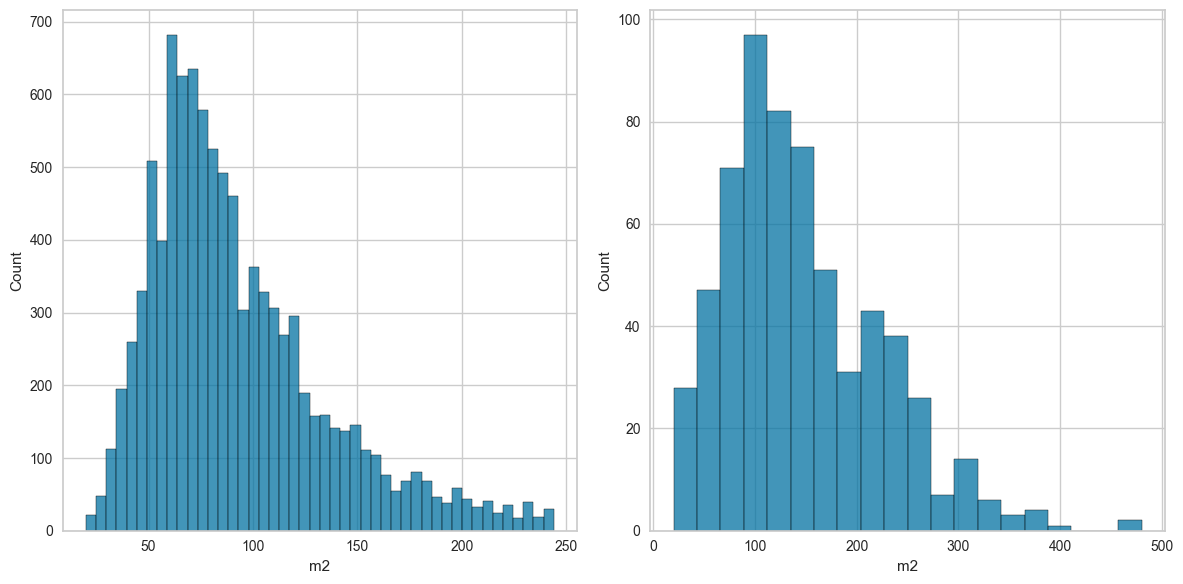

In [50]:
# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot on the first subplot
sns.histplot(data=df_ad_housing,ax=axes[0],x='m2')
sns.histplot(data=df_unseen,ax=axes[1],x='m2')

# Show the plots
plt.tight_layout()
plt.show()

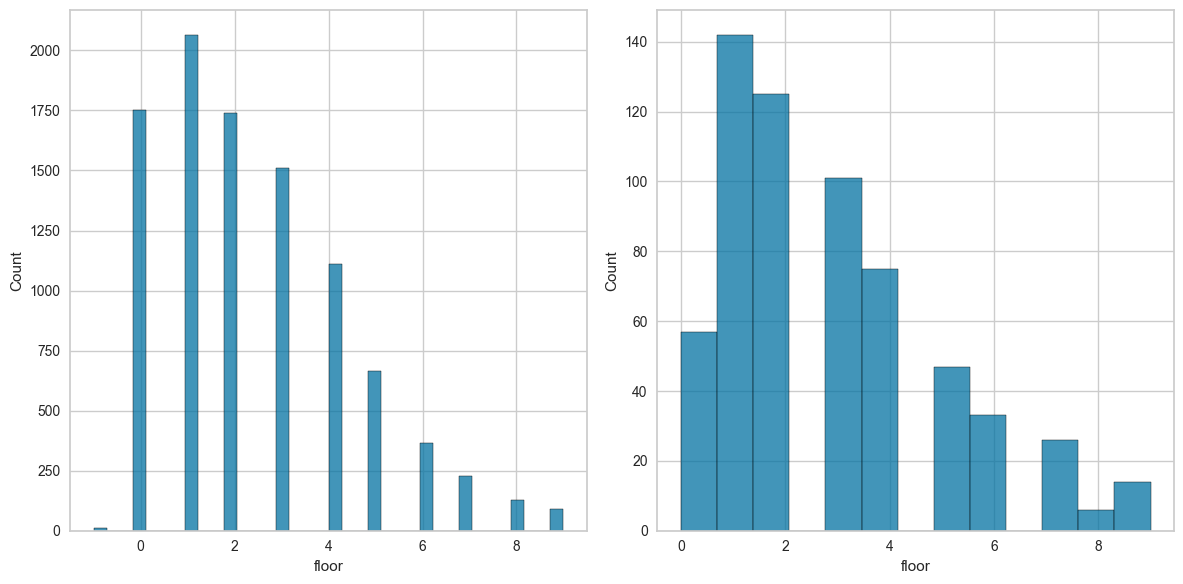

In [51]:
# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot on the first subplot
sns.histplot(data=df_ad_housing,ax=axes[0],x='floor')
sns.histplot(data=df_unseen,ax=axes[1],x='floor')

# Show the plots
plt.tight_layout()
plt.show()

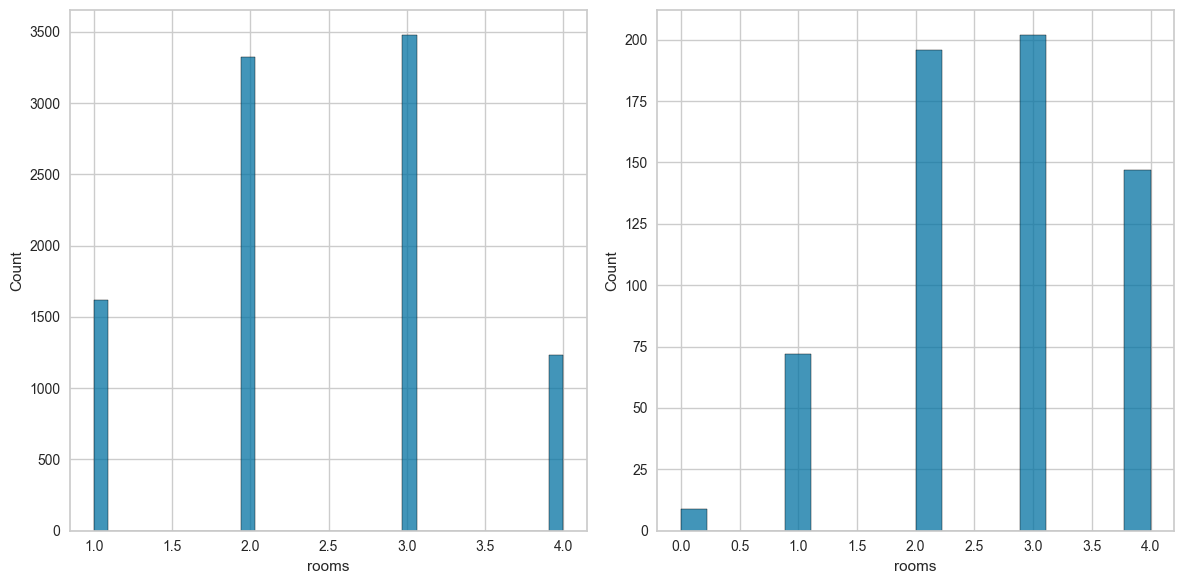

In [52]:
# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot on the first subplot
sns.histplot(data=df_ad_housing,ax=axes[0],x='rooms')
sns.histplot(data=df_unseen,ax=axes[1],x='rooms')

# Show the plots
plt.tight_layout()
plt.show()

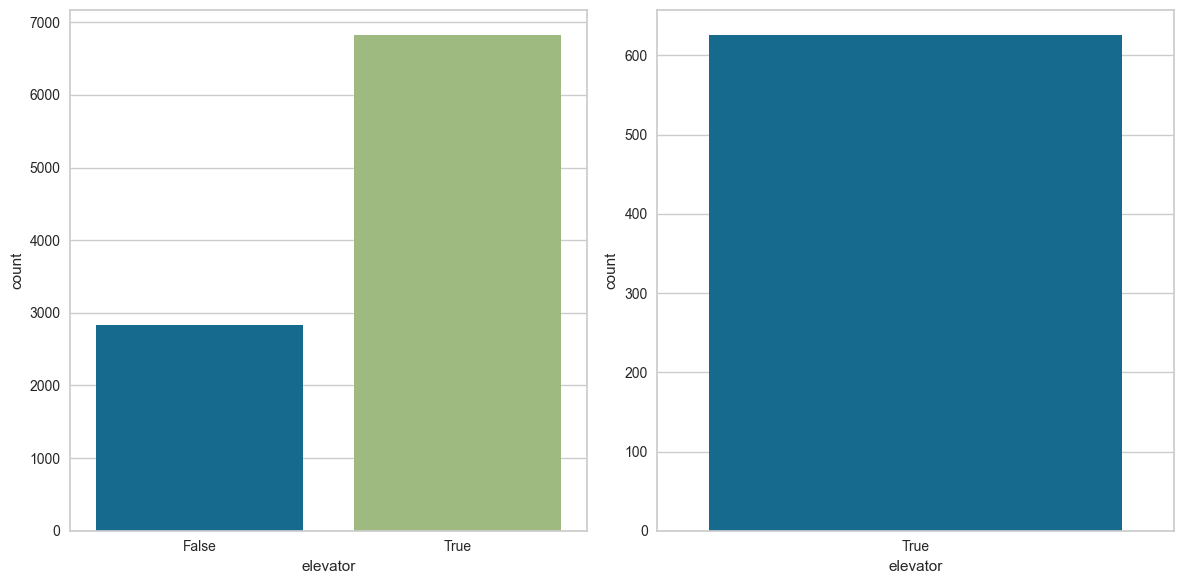

In [53]:
# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot on the first subplot
sns.countplot(data=df_ad_housing,ax=axes[0],x='elevator')
sns.countplot(data=df_unseen,ax=axes[1],x='elevator')

# Show the plots
plt.tight_layout()
plt.show()

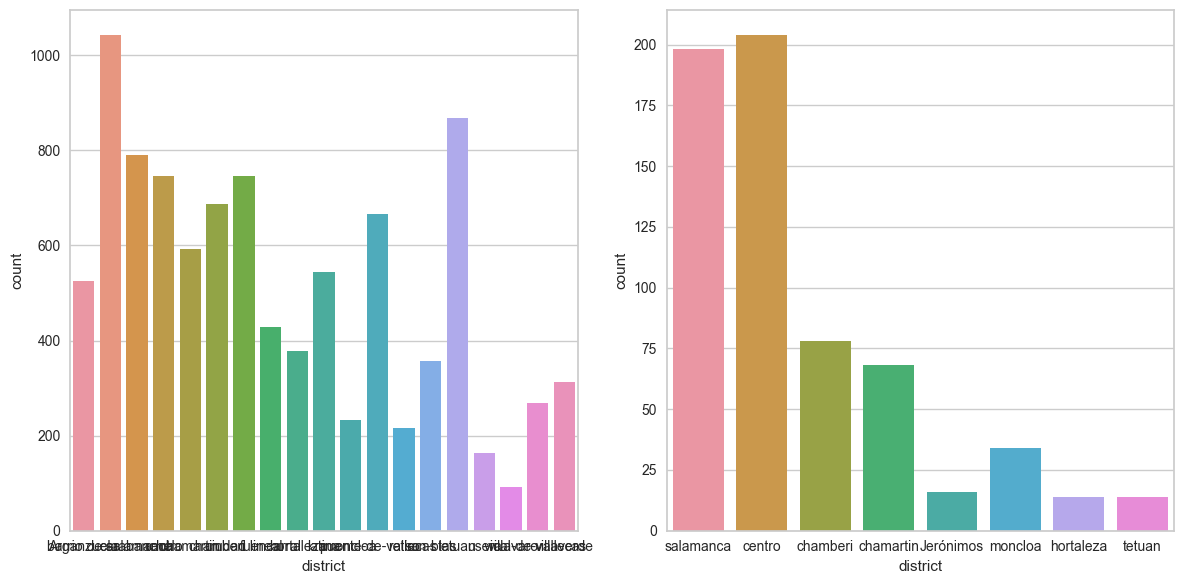

In [54]:
# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot on the first subplot
sns.countplot(data=df_ad_housing,ax=axes[0],x='district')
sns.countplot(data=df_unseen,ax=axes[1],x='district')

# Show the plots
plt.tight_layout()
#plt.xticks(rotate = 90)
plt.show()

In [55]:
df_ad_housing['district'].unique()

array(['Arganzuela', 'barrio de salamanca', 'carabanchel', 'centro',
       'chamartin', 'chamberi', 'ciudad lineal', 'fuencarral',
       'hortaleza', 'latina', 'moncloa', 'puente-de-vallecas', 'retiro',
       'san-blas', 'tetuan', 'usera', 'vicalvaro', 'villa-de-vallecas',
       'villaverde'], dtype=object)

In [56]:
df_unseen['district'].unique()

array(['salamanca', 'centro', 'chamberi', 'chamartin', 'Jerónimos',
       'moncloa', 'hortaleza', 'tetuan'], dtype=object)